# Improved Prediction using cleaned data+ stopwords and Word2Vec

Achieved better results by cleaning unnecessary punctuations and using NLTK stopwords to clean the text.



## Basic Imports

In [1]:
import re
import nltk
import gensim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore specific warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Your code here
# Perform scikit-learn operations that may generate warnings


## Loading Dataset

In [4]:
# Load the 20 Newsgroups dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

## Data Cleaning Process

Here we perform the data cleaning process discussed in the intro section

In [5]:
# Function to clean up the text
def clean_text(text):
    # Remove user names
    text = re.sub(r'\S+@\S+', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [token for token in tokens if token not in stopwords]
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [6]:
# Clean up the text in the dataset
cleaned_text = [clean_text(text) for text in newsgroups_train.data]

## Word2Vec Embeddings Extraction

In [7]:
# Create Word2Vec model
sentences = [nltk.word_tokenize(text) for text in cleaned_text]
word2vec_model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=1)

In [8]:
# Convert text to Word2Vec vectors
word_vectors = np.zeros((len(cleaned_text), 100))
for i, sentence in enumerate(sentences):
    for word in sentence:
        if word in word2vec_model.wv:
            word_vectors[i] += word2vec_model.wv[word]

## Basic Housekeeping for classification task

In [9]:
# Function to print classification results
def print_classification_results(model_name, y_true, y_pred, label_limit=7):
    print(model_name + ":")
    print("------------------------")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("------------------------")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()
    print()
    # Print actual versus predicted labels
    print("------------------------")
    actual_labels = [newsgroups_train.target_names[label] for label in y_true]
    predicted_labels = [newsgroups_train.target_names[label] for label in y_pred]
    print()
    print("------------------------")
    print(f"Actual vs Predicted Labels ({model_name}):")
    for actual, predicted in zip(actual_labels, predicted_labels):
        if label_limit > 0:
            print(f"Actual: {actual}  Predicted: {predicted}")
            label_limit -= 1
    print("------------------------")

In [10]:
# Classification function
def classification(model_name, X, y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the model based on the given model_name
    if model_name == "Logistic Regression":
        model = LogisticRegression()
    elif model_name == "SVC Linear":
        model = SVC(kernel='linear')
    elif model_name == "Random Forest":
        model = RandomForestClassifier()
    elif model_name == "XGBoost":
        model = XGBClassifier()
    else:
        print("Invalid model name!")
        return

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Print classification results
    print_classification_results(model_name, y_test, predictions)

## Classifiers Used:



*   Logistic Regression
*   SVC Linear
*   Random Forest
*   XGBoost



In [11]:
# Array of model names
models = ["Logistic Regression", "SVC Linear", "Random Forest", "XGBoost"]

### Logistic Regression

Logistic Regression:
------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74        86
           1       0.76      0.88      0.82       107
           2       0.81      0.66      0.73       132
           3       0.76      0.78      0.77       127

    accuracy                           0.77       452
   macro avg       0.76      0.77      0.76       452
weighted avg       0.77      0.77      0.76       452

------------------------
Confusion Matrix:


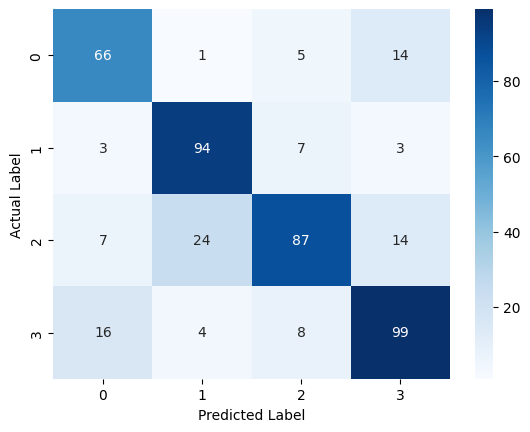


------------------------

------------------------
Actual vs Predicted Labels (Logistic Regression):
Actual: sci.med  Predicted: comp.graphics
Actual: soc.religion.christian  Predicted: alt.atheism
Actual: sci.med  Predicted: sci.med
Actual: soc.religion.christian  Predicted: soc.religion.christian
Actual: alt.atheism  Predicted: alt.atheism
Actual: alt.atheism  Predicted: alt.atheism
Actual: soc.religion.christian  Predicted: soc.religion.christian
------------------------


In [12]:
classification(models[0], word_vectors, newsgroups_train.target)

### SVC Linear

SVC Linear:
------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        86
           1       0.92      0.86      0.89       107
           2       0.84      0.85      0.85       132
           3       0.89      0.87      0.88       127

    accuracy                           0.87       452
   macro avg       0.86      0.87      0.87       452
weighted avg       0.87      0.87      0.87       452

------------------------
Confusion Matrix:


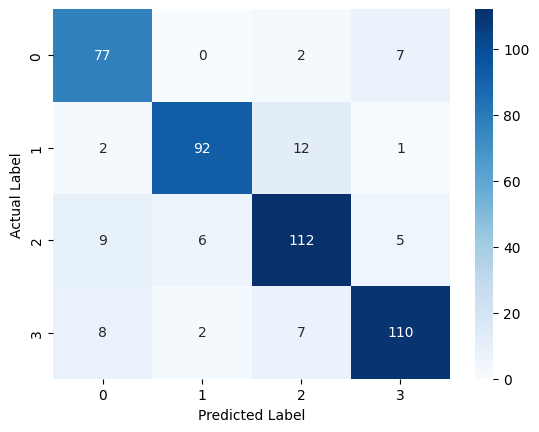


------------------------

------------------------
Actual vs Predicted Labels (SVC Linear):
Actual: sci.med  Predicted: alt.atheism
Actual: soc.religion.christian  Predicted: sci.med
Actual: sci.med  Predicted: sci.med
Actual: soc.religion.christian  Predicted: soc.religion.christian
Actual: alt.atheism  Predicted: alt.atheism
Actual: alt.atheism  Predicted: alt.atheism
Actual: soc.religion.christian  Predicted: soc.religion.christian
------------------------


In [13]:
classification(models[1], word_vectors, newsgroups_train.target)

### Random Forest

Random Forest:
------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        86
           1       0.77      0.87      0.82       107
           2       0.64      0.64      0.64       132
           3       0.76      0.72      0.74       127

    accuracy                           0.71       452
   macro avg       0.71      0.71      0.71       452
weighted avg       0.71      0.71      0.71       452

------------------------
Confusion Matrix:


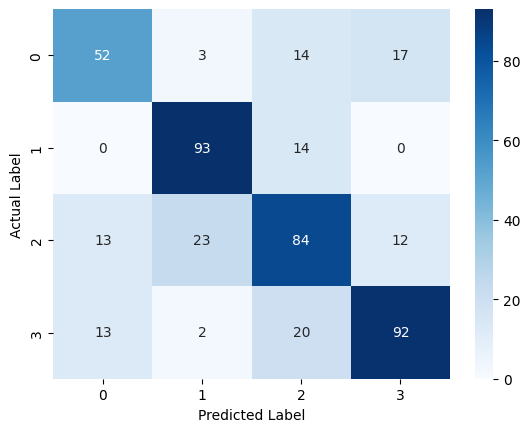


------------------------

------------------------
Actual vs Predicted Labels (Random Forest):
Actual: sci.med  Predicted: comp.graphics
Actual: soc.religion.christian  Predicted: alt.atheism
Actual: sci.med  Predicted: sci.med
Actual: soc.religion.christian  Predicted: soc.religion.christian
Actual: alt.atheism  Predicted: alt.atheism
Actual: alt.atheism  Predicted: alt.atheism
Actual: soc.religion.christian  Predicted: soc.religion.christian
------------------------


In [14]:
classification(models[2], word_vectors, newsgroups_train.target)

### XGBoost

XGBoost:
------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70        86
           1       0.78      0.85      0.82       107
           2       0.71      0.70      0.71       132
           3       0.79      0.75      0.77       127

    accuracy                           0.75       452
   macro avg       0.75      0.75      0.75       452
weighted avg       0.75      0.75      0.75       452

------------------------
Confusion Matrix:


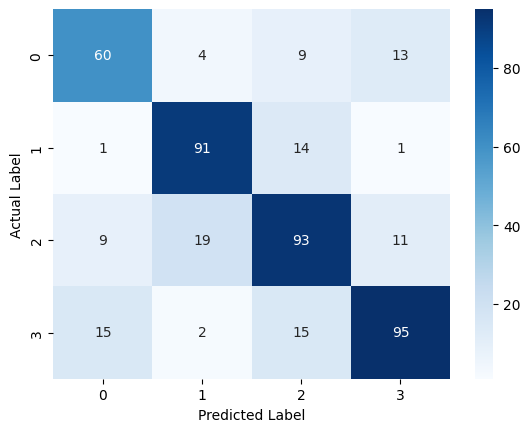


------------------------

------------------------
Actual vs Predicted Labels (XGBoost):
Actual: sci.med  Predicted: comp.graphics
Actual: soc.religion.christian  Predicted: alt.atheism
Actual: sci.med  Predicted: sci.med
Actual: soc.religion.christian  Predicted: soc.religion.christian
Actual: alt.atheism  Predicted: alt.atheism
Actual: alt.atheism  Predicted: alt.atheism
Actual: soc.religion.christian  Predicted: soc.religion.christian
------------------------


In [15]:
classification(models[3], word_vectors, newsgroups_train.target)

## Results

From the classification, we can see we have a clear winner, which is SVC Linear with 87% accuracy and fantatsic classification metrics and macro averages.